<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST_CNN


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [ ]:
# Processing Data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_test_original = x_test;
y_test_original = y_test;
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

11501568/11490434 [==============================] - 0s 0us/step


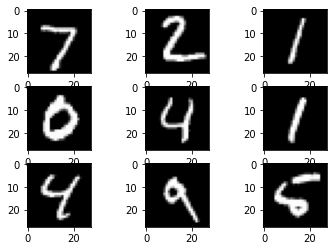

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow (x_test_original[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Create Model
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
checkpoint = ModelCheckpoint(filepath= "MNIST-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=100,verbose=1, 
                    validation_data=(x_test, y_test),callbacks=callbacks_list)

Epoch 1/256
466/469 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9923
Epoch 1: val_accuracy improved from -inf to 0.99180, saving model to MNIST-weights-01-0.9918.h5
469/469 [==============================] - 6s 11ms/step - loss: 0.0225 - accuracy: 0.9923 - val_loss: 0.0241 - val_accuracy: 0.9918
Epoch 2/256
468/469 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9935
Epoch 2: val_accuracy improved from 0.99180 to 0.99270, saving model to MNIST-weights-02-0.9927.h5
469/469 [==============================] - 5s 11ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0233 - val_accuracy: 0.9927
Epoch 3/256
468/469 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9948
Epoch 3: val_accuracy did not improve from 0.99270
469/469 [==============================] - 5s 11ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0269 - val_accuracy: 0.9918
Epoch 4/256
468/469 [============================>.] - ETA: 0s - lo

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model_json = model.to_json()
with open('MNIST_config.json', 'w') as json_file:
    json_file.write(model_json)

picture  1386
actual: 7
predictions: [7]


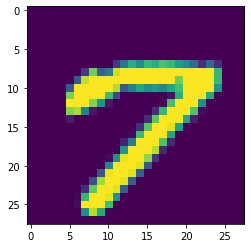

In [ ]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)

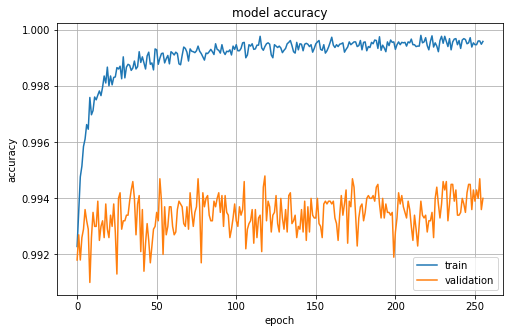

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc= 'lower right')
plt.show()